# Intro to using the PyShot Picker Tool
The PyShot picker tool is a tool for picking seismic events in a seismic signal. It is designed to be used with stream objects from the ObsPy library. 

First we import the PyShot package, as well as some other useful ones

In [17]:
import pyshot
import numpy as np

# Next we import the data we are interested in picking

Next we import the data we are interested in picking

In [3]:
seismic_data = pyshot.load.load_segy.loadshots("./sample_data/")

This creates a dictionary of stream objects, where the keys are the names of the files and the values are the stream objects containing all the traces in that file.

We can now plot the data to see what we are working with using the ObsPy plot function

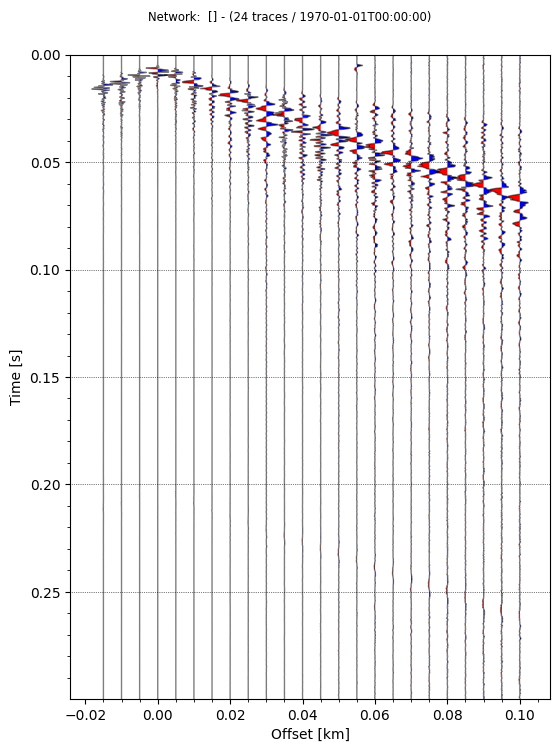

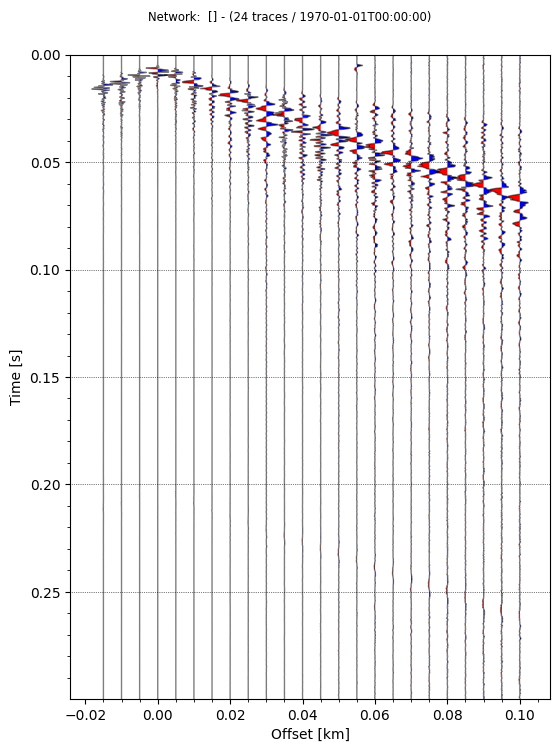

In [19]:
seismic_data['33.su'].plot(type='section', scale=1, time_down=True, fillcolors=('blue', 'red'), color='black',
                size=(600, 800))

We can do some early processing of the data now to make picking easier and accurate.
We will demean and taper the data:

In [18]:
for filename, stream in seismic_data.items():
    starttime = stream[0].stats.starttime
    stream.trim(starttime, starttime + 0.3) # This trims the data to the first 0.3 seconds
    for trace in stream:
        trace.detrend('linear')
        trace.detrend('demean')
        # trace.filter('bandpass', freqmin=10, freqmax=500, corners=4, zerophase=True)
        trace.data = np.require(trace.data, dtype=np.float32) # This fixes some issues with the data type